# 🚀 Project: Crypto Market Analysis using Public APIs

📌 Overview

In this project, we fetch real-time cryptocurrency market data using a public REST API and analyze it using Python. The goal is to demonstrate how APIs can be used as a data source in Data Science workflows.

## 📌 Objectives

Fetch cryptocurrency market data using Python requests

Understand API parameters and JSON responses

Convert API data into Pandas DataFrames

Perform exploratory data analysis (EDA)

Handle API errors gracefully

## 📌 Tools & Technologies

Python

Requests

Pandas

Kaggle Notebook

Public REST API (CoinGecko)

## 📌 Why This Project?

APIs are a common data source in real-world data science projects. This project simulates how data scientists collect, clean, and analyze live data from external services.

## 🔹 Module 2: Fetching Crypto Market Data from an API

In this module, we fetch real-time cryptocurrency market data from a public API.  
Unlike a single record API, this endpoint returns **multiple records in a list**, which is closer to real-world Data Science datasets.

This step demonstrates how APIs act as a data source similar to CSV or databases.


In [1]:
import requests
import pandas as pd


### 📌 API Used: CoinGecko (Public Crypto Market API)

We use the CoinGecko API because:
- No API key is required
- Provides real-world financial data
- Returns structured JSON suitable for analysis

Endpoint used:
`/coins/markets`


📌 Note:  
The analysis uses INR (`vs_currency = inr`) to make insights more relevant for the Indian market.  
The CoinGecko API automatically converts cryptocurrency prices into the selected fiat currency.


In [2]:
url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    "vs_currency": "inr",   # prices in USD
    "order": "market_cap_desc",
    "per_page": 10,         # top 10 coins
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)

print("Status Code:", response.status_code)


Status Code: 200


In [3]:
data = response.json()
data_type=type(data) # list
length=len(data) # length of data a
print(f"data type: {data_type} and length of the data is {length}")

data type: <class 'list'> and length of the data is 10


In [4]:
len(data[0]) # length is 26
data[0] # Values 

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'image': 'https://coin-images.coingecko.com/coins/images/1/large/bitcoin.png?1696501400',
 'current_price': 7014521,
 'market_cap': 140454467480475,
 'market_cap_rank': 1,
 'fully_diluted_valuation': 140454467480475,
 'total_volume': 7251176694352,
 'high_24h': 7230472,
 'low_24h': 6844663,
 'price_change_24h': -13848.640527824871,
 'price_change_percentage_24h': -0.19704,
 'market_cap_change_24h': 133019193991,
 'market_cap_change_percentage_24h': 0.0948,
 'circulating_supply': 19982656.0,
 'total_supply': 19982656.0,
 'max_supply': 21000000.0,
 'ath': 11187013,
 'ath_change_percentage': -37.29764,
 'ath_date': '2025-10-06T18:57:42.558Z',
 'atl': 3993.42,
 'atl_change_percentage': 175551.99358,
 'atl_date': '2013-07-05T00:00:00.000Z',
 'roi': None,
 'last_updated': '2026-02-03T03:05:16.151Z'}

In [5]:
import pandas as pd

df = pd.DataFrame(data)
df.sample(5)


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,7014521.00,140454467480475,1,140454467480475,7251176694352,7230472.00,...,1.998266e+07,21000000.0,11187013.00,-37.29764,2025-10-06T18:57:42.558Z,3993.42,1.755520e+05,2013-07-05T00:00:00.000Z,None,2026-02-03T03:05:16.151Z
6,solana,sol,Solana,https://coin-images.coingecko.com/coins/images...,9245.58,5242782365327,7,5734763557318,640613257628,9649.37,...,6.195831e+08,NaN,25396.00,-63.59480,2025-01-19T11:15:27.957Z,38.03,2.421403e+04,2020-05-11T19:35:23.449Z,None,2026-02-03T03:05:20.214Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,206650.00,25048059086663,2,25048059086663,4251415865131,218442.00,...,1.206937e+08,NaN,431946.00,-52.15843,2025-08-24T19:21:03.333Z,28.13,7.344911e+05,2015-10-20T00:00:00.000Z,"{'times': 38.36828366169579, 'currency': 'btc'...",2026-02-03T03:05:16.516Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,90.24,16725862272875,3,17219185314529,12280428216681,91.93,...,1.908206e+11,NaN,105.52,-14.48232,2025-01-25T16:51:57.989Z,36.86,1.448133e+02,2015-03-02T00:00:00.000Z,None,2026-02-03T03:05:13.086Z
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,68905.00,9411825395914,4,9411825395914,193387180528,71269.00,...,1.363599e+08,200000000.0,121422.00,-43.25128,2025-10-13T08:41:24.131Z,2.58,2.665758e+06,2017-10-19T00:00:00.000Z,None,2026-02-03T03:05:12.935Z


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10 non-null     object 
 1   symbol                            10 non-null     object 
 2   name                              10 non-null     object 
 3   image                             10 non-null     object 
 4   current_price                     10 non-null     float64
 5   market_cap                        10 non-null     int64  
 6   market_cap_rank                   10 non-null     int64  
 7   fully_diluted_valuation           10 non-null     int64  
 8   total_volume                      10 non-null     int64  
 9   high_24h                          10 non-null     float64
 10  low_24h                           10 non-null     float64
 11  price_change_24h                  10 non-null     float64
 12  price_chang

In [7]:
df.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,1.000000e+01,1.000000e+01,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,3.000000e+00,1.000000e+01,10.000000,10.000000,1.000000e+01
mean,7.506461e+05,2.180392e+13,5.50000,2.246522e+13,2.702092e+12,7.748244e+05,7.317802e+05,-1616.814875,-0.879978,-5.143740e+10,-0.684626,5.809952e+10,6.256869e+10,3.340700e+10,1.219841e+06,-52.222596,3986.161246,3.885355e+05
std,2.202501e+06,4.232978e+13,3.02765,4.214503e+13,4.110934e+12,2.270013e+06,2.149361e+06,4313.022436,0.828289,1.131771e+11,0.882101,7.201644e+10,7.427255e+10,5.767130e+10,3.506449e+06,23.401703,11211.780837,8.303981e+05
min,9.570000e+00,1.614390e+12,1.00000,1.614737e+12,9.097237e+09,1.005000e+01,9.170000e+00,-13848.640528,-1.961280,-3.049492e+11,-1.968630,9.582357e+06,9.582357e+06,2.100000e+07,3.653000e+01,-93.200510,0.005529,3.825049e+01
25%,9.025500e+01,3.126531e+12,3.25000,3.249535e+12,1.771994e+11,9.194500e+01,9.008250e+01,-759.723768,-1.665617,-8.390526e+10,-1.410003,1.246102e+08,1.246102e+08,1.105000e+08,1.576375e+02,-61.257640,0.764507,5.769807e+03
50%,4.694615e+03,7.565722e+12,5.50000,7.896504e+12,5.248585e+11,4.900015e+03,4.504920e+03,-10.298961,-0.773330,-3.397946e+10,-0.387390,3.070983e+10,3.564756e+10,2.000000e+08,1.336193e+04,-51.986465,32.495000,5.713625e+04
75%,1.722138e+05,1.489735e+13,7.75000,1.650879e+13,3.621314e+12,1.813480e+05,1.655518e+05,-1.605092,-0.228718,8.976468e+08,0.010935,8.870630e+10,9.866875e+10,5.010000e+10,3.534532e+05,-38.786050,58.490000,1.749095e+05
max,7.014521e+06,1.404545e+14,10.00000,1.404545e+14,1.228043e+13,7.230472e+06,6.844663e+06,0.036789,0.385920,1.330192e+11,0.410470,1.853537e+11,1.908206e+11,1.000000e+11,1.118701e+07,-14.482320,35697.000000,2.665758e+06


In [37]:
df[['id', 'symbol', 'current_price', 'market_cap', 'market_cap_rank']]


,id,symbol,current_price,market_cap,market_cap_rank
0,bitcoin,btc,7014521.00,140454467480475,1
1,ethereum,eth,206650.00,25048059086663,2
2,tether,usdt,90.24,16725862272875,3
3,binancecoin,bnb,68905.00,9411825395914,4
4,ripple,xrp,143.65,8750477733417,5
5,usd-coin,usdc,90.30,6380966559167,6
6,solana,sol,9245.58,5242782365327,7
7,tron,trx,25.56,2421113442632,8
8,staked-ether,steth,206780.00,1989230989169,9
9,dogecoin,doge,9.57,1614390161949,10


## 🔹 Module 3: API Parameters & Comparative Market Analysis

In this module, we explore how API parameters control the data returned by an endpoint.  
We also compare cryptocurrency prices across different fiat currencies to demonstrate analytical thinking using API-driven data.


In [43]:
def fetch_crypto_data(vs_currency="usd", per_page=10, page=1):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    
    params = {
        "vs_currency": vs_currency,
        "order": "market_cap_desc",
        "per_page": per_page,
        "page": page,
        "sparkline": False
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        return pd.DataFrame(response.json())
    else:
        print("Error:", response.status_code)
        return pd.DataFrame()




df_inr is empty — API call failed


In [44]:
print(fetch_crypto_data())

             id symbol               name  \
0       bitcoin    btc            Bitcoin   
1      ethereum    eth           Ethereum   
2        tether   usdt             Tether   
3   binancecoin    bnb                BNB   
4        ripple    xrp                XRP   
5      usd-coin   usdc               USDC   
6        solana    sol             Solana   
7          tron    trx               TRON   
8  staked-ether  steth  Lido Staked Ether   
9      dogecoin   doge           Dogecoin   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   78004.000000   
1  https://coin-images.coingecko.com/coins/images...    2303.600000   
2  https://coin-images.coingecko.com/coins/images...       0.999139   
3  https://coin-images.coingecko.com/coins/images...     766.800000   
4  https://coin-images.coingecko.com/coins/images...       1.590000   
5  https://coin-images.coingecko.com/coins/images...       0.999631   
6  http

### 📌 Reusable API Data Extraction

To avoid repeated code and improve maintainability, we define a reusable function that fetches cryptocurrency market data based on dynamic parameters such as currency and record limits.


In [45]:
df_usd=fetch_crypto_data(vs_currency="usd", per_page=10, page=1)
df_inr=fetch_crypto_data(vs_currency="inr", per_page=10, page=1)


### 📌 USD vs INR Price Comparison

To understand how cryptocurrency prices vary across fiat currencies, we compare the same set of cryptocurrencies priced in USD and INR.  
This analysis highlights the importance of contextual currency selection in financial data analysis.


In [46]:
usd_id_cp=df_usd[["id","current_price"]]



In [47]:
inr_id_cp=df_inr[["id","current_price"]]
df_inr.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,7043704.00,140217663122691,1,140217663122691,7166818350862,7230472.00,...,1.998266e+07,2.100000e+07,11187013.00,-37.03678,2025-10-06T18:57:42.558Z,3993.420000,1.762828e+05,2013-07-05T00:00:00.000Z,None,2026-02-03T03:14:10.636Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,208042.00,25038840270060,2,25038840270060,4238526578847,218442.00,...,1.206937e+08,NaN,431946.00,-51.83613,2025-08-24T19:21:03.333Z,28.130000,7.394398e+05,2015-10-20T00:00:00.000Z,"{'times': 38.48326631917615, 'currency': 'btc'...",2026-02-03T03:14:10.929Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,90.22,16722380624237,3,17215600975969,12286125245450,91.93,...,1.908206e+11,NaN,105.52,-14.48232,2025-01-25T16:51:57.989Z,36.860000,1.448133e+02,2015-03-02T00:00:00.000Z,None,2026-02-03T03:14:10.922Z
3,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,69237.00,9410236324723,4,9410236324723,192804024441,71269.00,...,1.363599e+08,2.000000e+08,121422.00,-42.97807,2025-10-13T08:41:24.131Z,2.580000,2.678592e+06,2017-10-19T00:00:00.000Z,None,2026-02-03T03:14:10.798Z
4,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,144.04,8741686305056,5,14363145383074,411285769751,150.66,...,9.998572e+10,1.000000e+11,313.99,-54.12673,2025-07-21T15:02:00.541Z,0.159343,9.029380e+04,2013-08-16T00:00:00.000Z,None,2026-02-03T03:14:14.927Z


In [48]:
df_compare=usd_id_cp.merge(inr_id_cp , on="id" , suffixes =("_usd","_inr"))
df_compare



,id,current_price_usd,current_price_inr
0,bitcoin,78004.000000,7043704.00
1,ethereum,2303.600000,208042.00
2,tether,0.999139,90.22
3,binancecoin,766.800000,69237.00
4,ripple,1.590000,144.04
5,usd-coin,0.999631,90.28
6,solana,102.490000,9257.87
7,tron,0.282920,25.55
8,staked-ether,2301.370000,207915.00
9,dogecoin,0.106049,9.58


In [49]:
df_compare["conversion_ratio"] = df_compare["current_price_inr"]/df_compare["current_price_usd"]
df_compare.head()

,id,current_price_usd,current_price_inr,conversion_ratio
0,bitcoin,78004.000000,7043704.00,90.299267
1,ethereum,2303.600000,208042.00,90.311686
2,tether,0.999139,90.22,90.297746
3,binancecoin,766.800000,69237.00,90.293427
4,ripple,1.590000,144.04,90.591195


📌 Insight:

Conversion ratio ~ INR/USD exchange rate

Validates data correctness


In [50]:
df_compare.sort_values(by="current_price_inr") # shorted data Frame on basis of current_price inr

,id,current_price_usd,current_price_inr,conversion_ratio
9,dogecoin,0.106049,9.58,90.335600
7,tron,0.282920,25.55,90.308214
2,tether,0.999139,90.22,90.297746
5,usd-coin,0.999631,90.28,90.313326
4,ripple,1.590000,144.04,90.591195
6,solana,102.490000,9257.87,90.329496
3,binancecoin,766.800000,69237.00,90.293427
8,staked-ether,2301.370000,207915.00,90.344012
1,ethereum,2303.600000,208042.00,90.311686
0,bitcoin,78004.000000,7043704.00,90.299267


## 🔹 Module 4: Data Cleaning, Feature Selection & Exploratory Data Analysis

In this module, we clean the raw cryptocurrency market data fetched from the API, select relevant features, and perform basic exploratory data analysis to extract meaningful insights.


In [51]:
df_inr_shape=df_inr.shape
df_inr_columns = df_inr.columns
print(f"Shape of Indian Currency crypto Data Frame is rows {df_inr_shape[0]} and columns {df_inr_shape[1]} ")

Shape of Indian Currency crypto Data Frame is rows 10 and columns 26 


In [52]:
"""'id',
    'symbol',
    'name',
    'current_price',
    'market_cap',
    'market_cap_rank',
    'total_volume',
    'price_change_percentage_24h'"""

"'id',\n    'symbol',\n    'name',\n    'current_price',\n    'market_cap',\n    'market_cap_rank',\n    'total_volume',\n    'price_change_percentage_24h'"

In [53]:
selected_cols = [
    'id',
    'symbol',
    'name',
    'current_price',
    'market_cap',
    'market_cap_rank',
    'total_volume',
    'price_change_percentage_24h'
]

df_clean=df_inr[selected_cols].copy() # 📌 .copy() avoids chained assignment issues 
df_clean.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,7043704.00,140217663122691,1,7166818350862,0.41899
1,ethereum,eth,Ethereum,208042.00,25038840270060,2,4238526578847,0.37619
2,tether,usdt,Tether,90.22,16722380624237,3,12286125245450,-1.81237
3,binancecoin,bnb,BNB,69237.00,9410236324723,4,192804024441,-0.43957
4,ripple,xrp,XRP,144.04,8741686305056,5,411285769751,-0.69555


### 📌 Feature Selection

Only relevant features related to price, market capitalization, trading volume, and short-term price movement are selected.  
This reduces noise and prepares the dataset for focused analysis.


In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10 non-null     object 
 1   symbol                       10 non-null     object 
 2   name                         10 non-null     object 
 3   current_price                10 non-null     float64
 4   market_cap                   10 non-null     int64  
 5   market_cap_rank              10 non-null     int64  
 6   total_volume                 10 non-null     int64  
 7   price_change_percentage_24h  10 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 772.0+ bytes


In [55]:
# Missing Value Check
df_clean.isnull().sum()

id                             0
symbol                         0
name                           0
current_price                  0
market_cap                     0
market_cap_rank                0
total_volume                   0
price_change_percentage_24h    0
dtype: int64

In [56]:
# Top Coins by Market Cap
df_clean.sort_values('market_cap',ascending=False).head(10)

,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,price_change_percentage_24h
0,bitcoin,btc,Bitcoin,7043704.00,140217663122691,1,7166818350862,0.41899
1,ethereum,eth,Ethereum,208042.00,25038840270060,2,4238526578847,0.37619
2,tether,usdt,Tether,90.22,16722380624237,3,12286125245450,-1.81237
3,binancecoin,bnb,BNB,69237.00,9410236324723,4,192804024441,-0.43957
4,ripple,xrp,XRP,144.04,8741686305056,5,411285769751,-0.69555
5,usd-coin,usdc,USDC,90.28,6380276688281,6,1919496111753,-1.86362
6,solana,sol,Solana,9257.87,5238652063630,7,641196001492,0.89203
7,tron,trx,TRON,25.55,2420290931261,8,82096009414,-1.97773
8,staked-ether,steth,Lido Staked Ether,207915.00,1979039819267,9,8612649507,0.92720
9,dogecoin,doge,Dogecoin,9.58,1612008786234,10,171061396444,0.50810


In [57]:
# Biggest Gainers & Losers (24h)
df_clean.sort_values('price_change_percentage_24h', ascending=False).head(5)


,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,price_change_percentage_24h
8,staked-ether,steth,Lido Staked Ether,207915.00,1979039819267,9,8612649507,0.92720
6,solana,sol,Solana,9257.87,5238652063630,7,641196001492,0.89203
9,dogecoin,doge,Dogecoin,9.58,1612008786234,10,171061396444,0.50810
0,bitcoin,btc,Bitcoin,7043704.00,140217663122691,1,7166818350862,0.41899
1,ethereum,eth,Ethereum,208042.00,25038840270060,2,4238526578847,0.37619


In [58]:
df_clean.sort_values('price_change_percentage_24h').head(5)


,id,symbol,name,current_price,market_cap,market_cap_rank,total_volume,price_change_percentage_24h
7,tron,trx,TRON,25.55,2420290931261,8,82096009414,-1.97773
5,usd-coin,usdc,USDC,90.28,6380276688281,6,1919496111753,-1.86362
2,tether,usdt,Tether,90.22,16722380624237,3,12286125245450,-1.81237
4,ripple,xrp,XRP,144.04,8741686305056,5,411285769751,-0.69555
3,binancecoin,bnb,BNB,69237.00,9410236324723,4,192804024441,-0.43957


In [59]:
# Categorize Coins by Market Cap
def market_cap_category(market_cap):
    if market_cap >= 1e12:
        return "Mega cap"
    if market_cap >= 1e11:
        return "Large cap"
    if market_cap >= 1e10:
        return "Mid cap"

df_inr["market_cap_category"] = df_inr["market_cap"].apply(market_cap_category)

In [60]:
df_inr[["name","market_cap","market_cap_category"]]

,name,market_cap,market_cap_category
0,Bitcoin,140217663122691,Mega cap
1,Ethereum,25038840270060,Mega cap
2,Tether,16722380624237,Mega cap
3,BNB,9410236324723,Mega cap
4,XRP,8741686305056,Mega cap
5,USDC,6380276688281,Mega cap
6,Solana,5238652063630,Mega cap
7,TRON,2420290931261,Mega cap
8,Lido Staked Ether,1979039819267,Mega cap
9,Dogecoin,1612008786234,Mega cap


### 📌 Feature Engineering

A new categorical feature based on market capitalization is created to segment cryptocurrencies into different market tiers.  
This helps in comparative analysis across market segments.


In [61]:
# Count how many coins fall in each market_cap_category.
count_market_cap_category =df_inr[["name","market_cap_category"]].groupby("market_cap_category")["name"].count()
print(f"Total :\n{count_market_cap_category}")

Total :
market_cap_category
Mega cap    10
Name: name, dtype: int64


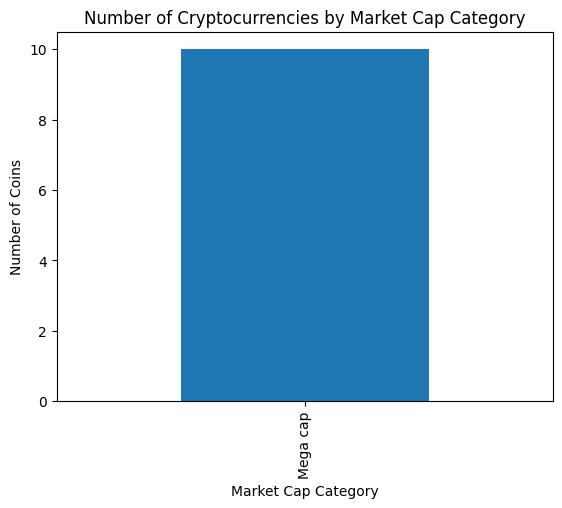

In [62]:
import matplotlib.pyplot as plt

plt.figure()
count_market_cap_category.plot(kind="bar")

plt.xlabel("Market Cap Category")
plt.ylabel("Number of Coins")
plt.title("Number of Cryptocurrencies by Market Cap Category")

plt.show()


**Her the above chart shows only mega cap , it could have shown "Large cap" and "Small**** cap" if we would have imported "param {per_page = 10}"**

## 🔹 Module 5: Data Visualization & Insight Storytelling

In this module, we visualize key cryptocurrency market metrics to identify trends, distributions, and relationships.  
Effective visualizations help translate raw data into actionable insights for decision-making.


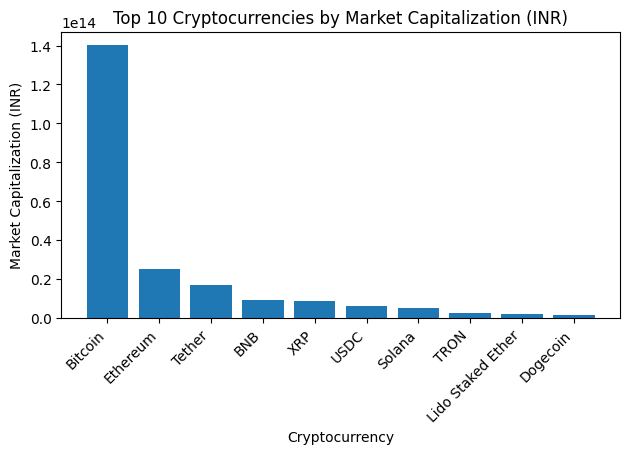

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 Cryptocurrencies by Market Cap
top_market_cap = df_clean.sort_values('market_cap', ascending=False).head(10)

plt.figure()
plt.bar(top_market_cap['name'], top_market_cap['market_cap'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Capitalization (INR)")
plt.title("Top 10 Cryptocurrencies by Market Capitalization (INR)")
plt.tight_layout()
plt.show()



📌 Insight:  
Bitcoin and Ethereum dominate the market in terms of capitalization, indicating a high level of market concentration among top cryptocurrencies.


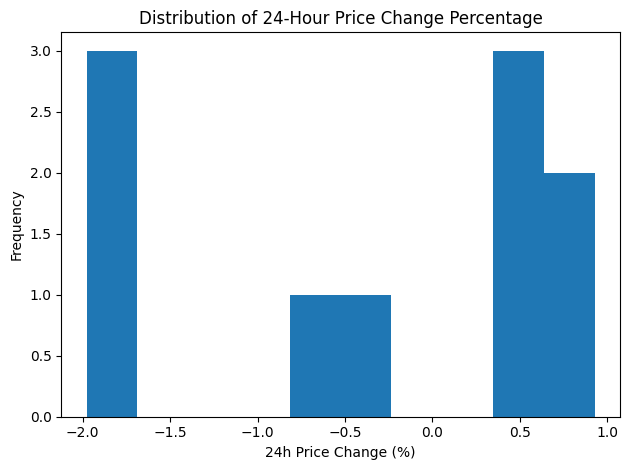

In [68]:
# Distribution of 24-Hour Price Change
plt.figure()
plt.hist(df_clean['price_change_percentage_24h'])
plt.xlabel("24h Price Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of 24-Hour Price Change Percentage")
plt.tight_layout()
plt.show()


📌 Insight:  
Most cryptocurrencies experience small price changes within 24 hours, while extreme gains or losses are relatively rare.


## 🔹 Enhanced Visual Analysis using Seaborn

In this section, Seaborn is used to create clean and informative statistical visualizations that help identify patterns and relationships within the cryptocurrency market data.


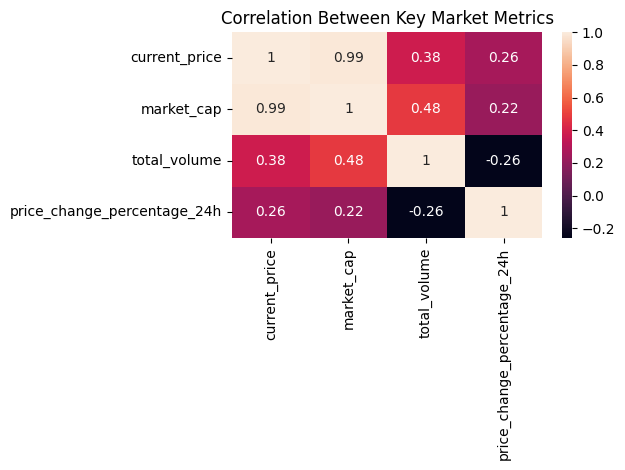

In [69]:
plt.figure()
sns.heatmap(
    df_clean[['current_price', 'market_cap', 'total_volume', 'price_change_percentage_24h']].corr(),
    annot=True
)
plt.title("Correlation Between Key Market Metrics")
plt.tight_layout()
plt.show()


## 🏁 Project Conclusion

In this project, real-time cryptocurrency market data was fetched using a public REST API and analyzed using Python.  
The workflow simulated a real-world data science pipeline, starting from API data extraction to data cleaning, analysis, and visualization.

### ✅ Key Takeaways
- APIs can serve as powerful real-time data sources for data science projects.
- Market capitalization and trading volume show strong positive correlation, indicating higher liquidity for large-cap cryptocurrencies.
- Large-cap and mega-cap cryptocurrencies exhibit relatively lower short-term volatility compared to small-cap coins.
- Currency context (USD vs INR) is important for region-specific financial analysis.

### 📌 Skills Demonstrated
- API integration using Python `requests`
- Parameterized API calls
- JSON to Pandas DataFrame conversion
- Data cleaning and feature engineering
- Exploratory Data Analysis (EDA)
- Insight-driven visual storytelling

This project demonstrates how external APIs can be effectively integrated into analytical workflows to derive meaningful insights.
